# Data Exploratory Analysis
## 1. View the Detail of Raw Data
The dataset has been divided into 2 parts, i.e. features and target. There are 8 features, and 1 target (Rings) in the dataset.  
The mean, STD(standard Deviation), min, IQR(Interquartile Range) and max have been displyed below.

In [1]:
import  pandas as pd
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
abalone = fetch_ucirepo(id=1) 

# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 

# View information about Feature
print(X.info())

# View Target about Feature
print(y.info())

# View information in the first few lines
print(X.head())
print(y.head())

# Statistical description
print(X.describe())
print(y.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
dtypes: float64(7), object(1)
memory usage: 261.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rings   4177 non-null   int64
dtypes: int64(1)
memory usage: 32.8 KB
None
  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140    

## 2. Check Missing Data
There is no null value in the feature data and target data.

In [2]:
# Check for missing values in feature data
print(X.isnull().sum())

# Check for missing values in Target data
print(y.isnull().sum())


Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64
Rings    0
dtype: int64


## 3. Visulization of Raw Data
### 3.1. Distribution of Each Feature Value
It is obvious to get the distribution of each feature value by histograms and boxplots.

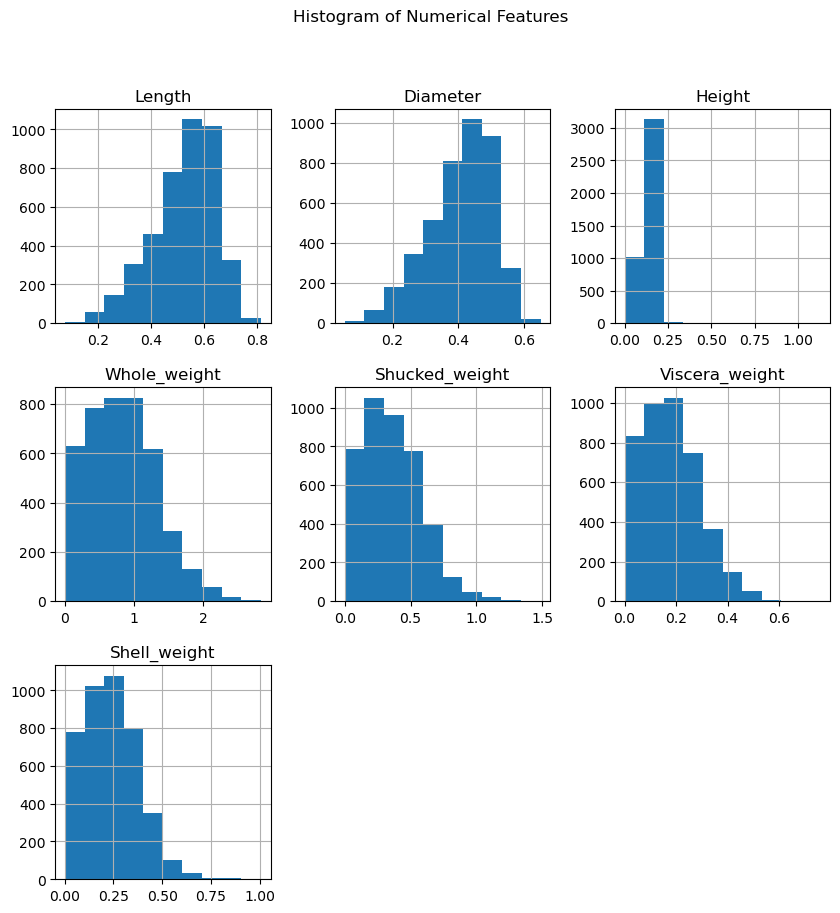

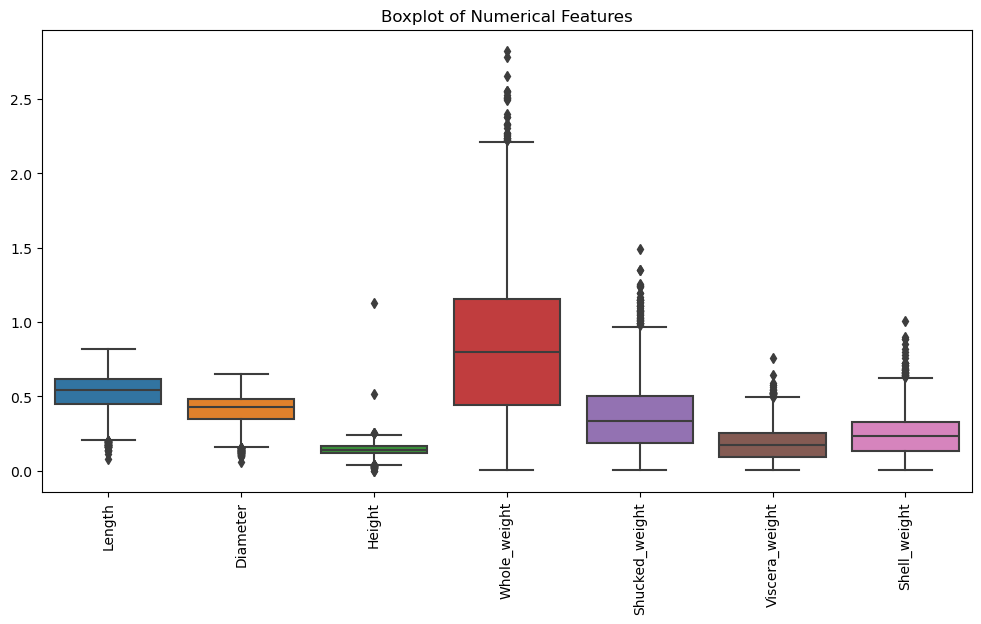

In [3]:
import matplotlib.pyplot as plt

# plot a histogram of each feature
X.hist(bins=10, figsize=(10, 10))
plt.suptitle('Histogram of Numerical Features')
plt.show()

# plot a box plot to check outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()



### 3.2. Distribution of "Sex" Feature

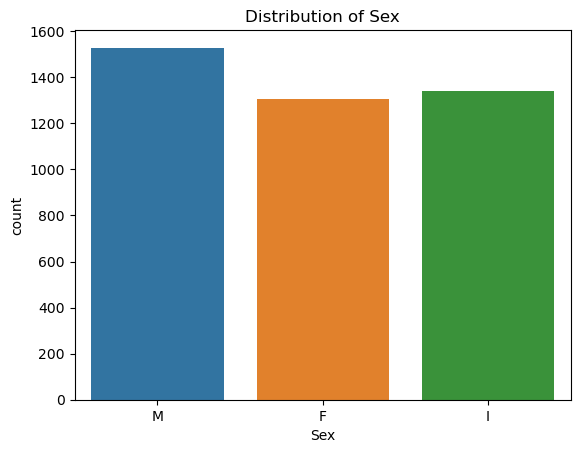

In [4]:
sns.countplot(x='Sex', data=X)
plt.title('Distribution of Sex')
plt.show()


## 4. Data Processing
- **Transfrom non-numeric to numeric:** Values in "Sex" feature has been transformed to "0, 1, 2" seperately from "M, F, I".
- **Delete NA:** Delete all the NA in features data.
- **Ajust the data:** Adjust the length of the target data to match the features.

In [7]:
# replace M:0, F:1, I:2
X.loc[:, 'Sex'] = X['Sex'].replace({'M': 0, 'F': 1, 'I': 2})
# select all columns except sex
columns_to_check = X.columns.difference(['Sex'])
# Delete all rows with values <= 0
X = X[(X[columns_to_check] > 0).all(axis=1)]
# delete NA
X_cleaned = X.dropna()
X_cleaned = X_cleaned.reset_index(drop=True)
# make sure y and x have the same rows
y = y.iloc[X_cleaned.index].reset_index(drop=True)

## 5. Visulization of Processed Data
### 5.1. Heatmap of correlation matrix
From the heatmap, correlation coefficient between target and features can be observed.

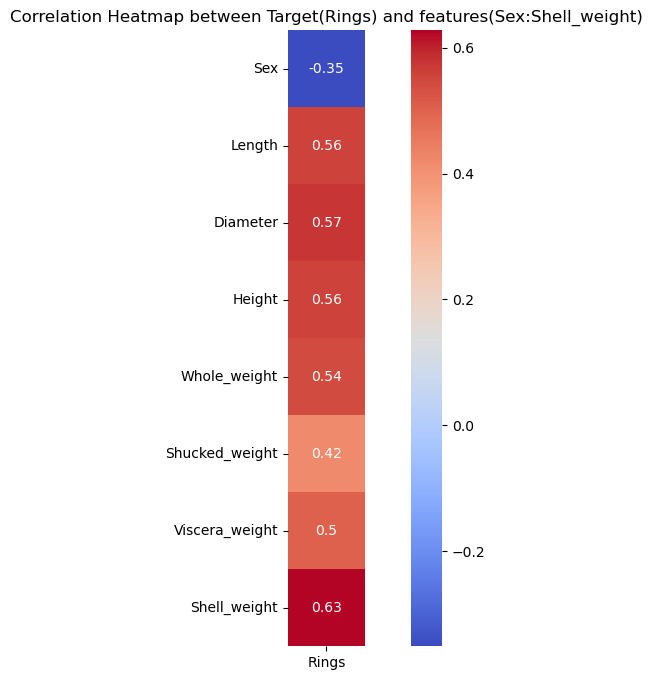

In [70]:
# combine two datafram
combined_datafram = pd.concat([X_cleaned,y], axis = 1)
# print(combined_datafram)
# combined_datafram.to_csv('./Desktop/5836A2/data/processed_data.csv')

cor_matrix = combined_datafram.corr()
# print(cor_matrix)
# y_cor = cor_matrix[['Rings']].drop('Rings')
y_cor = cor_matrix.drop('Rings', axis=0)['Rings'].to_frame()
# print(y_cor)

# create length 12, width 8
plt.figure(figsize = (12, 8))
sns.heatmap(y_cor, annot = True, cmap = 'coolwarm', cbar = True, square = True)
plt.title('Correlation Heatmap between Target(Rings) and features(Sex:Shell_weight)')
plt.show()



## 5.2. Scatterplot
Two features with strongest correlation coefficient aginst target have been selected, i.e. "Shell_weight" feature and "Diameter" feature.  
Scatter plots of Shell_weight against Rings and Diameter against Rings are shown below.

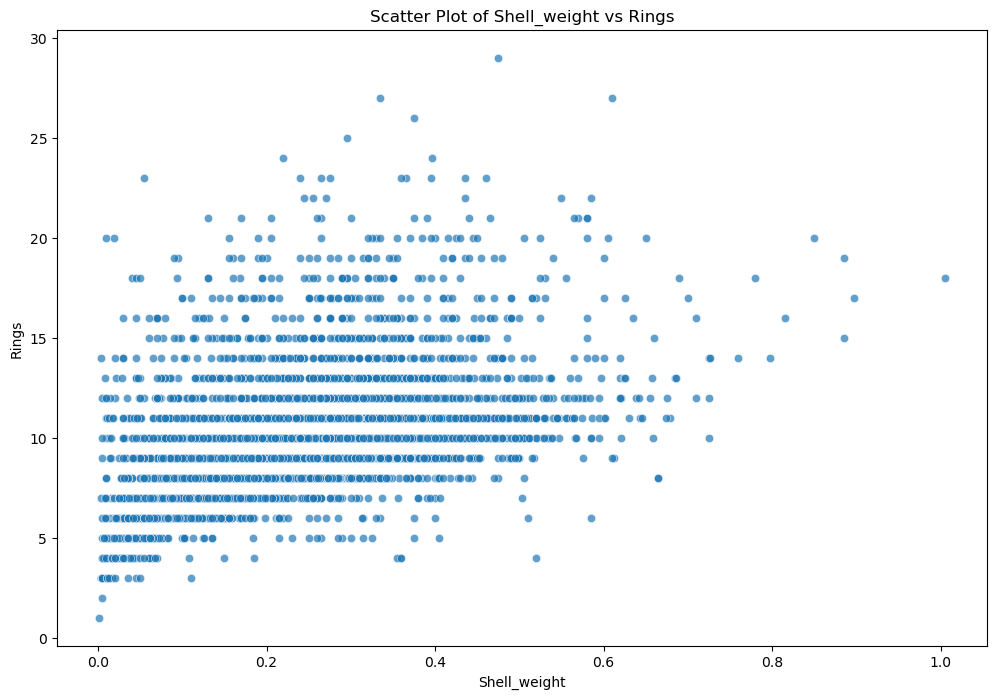

In [8]:
scatter_data = pd.DataFrame({'Shell_weight': X_cleaned['Shell_weight'], 'Rings': y['Rings']})

plt.figure(figsize = (12, 8))
sns.scatterplot(data = scatter_data, x = 'Shell_weight', y = 'Rings', alpha = 0.7)

plt.title('Scatter Plot of Shell_weight vs Rings')
plt.xlabel('Shell_weight')
plt.ylabel('Rings')

plt.show()

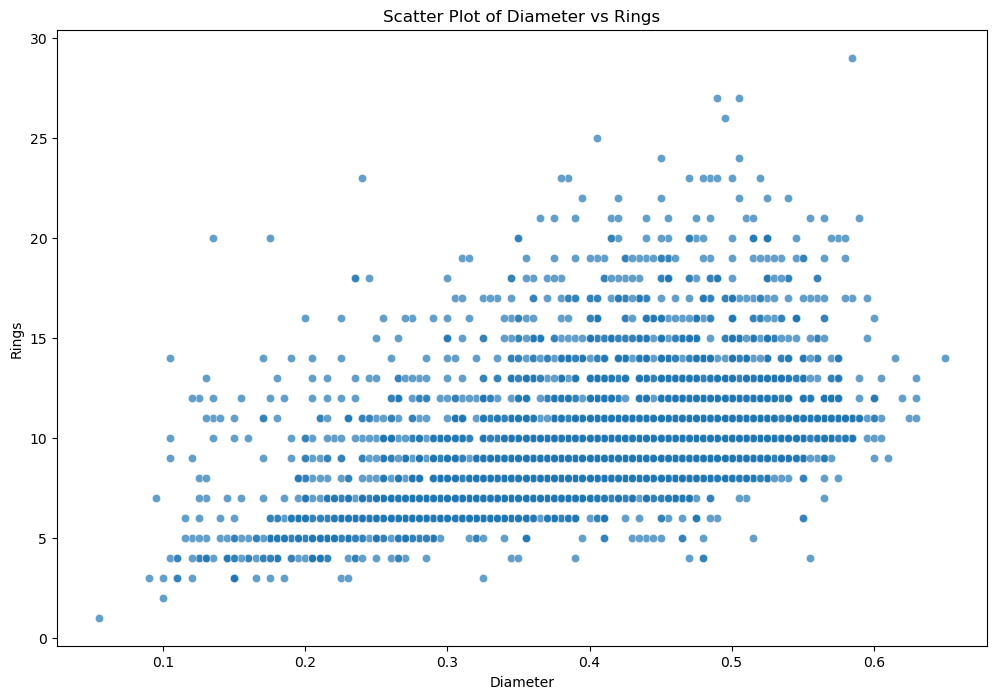

In [9]:
scatter_data = pd.DataFrame({'Diameter': X_cleaned['Diameter'], 'Rings': y['Rings']})

plt.figure(figsize = (12, 8))
sns.scatterplot(data = scatter_data, x = 'Diameter', y = 'Rings', alpha = 0.7)

plt.title('Scatter Plot of Diameter vs Rings')
plt.xlabel('Diameter')
plt.ylabel('Rings')

plt.show()

### 5.3. Histogram
Two features with strongest correlation coefficient aginst target have been selected, i.e. "Shell_weight" feature and "Diameter" feature.  
Frequency histogram of Shell_weight, Diameter and Rings are shown below.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


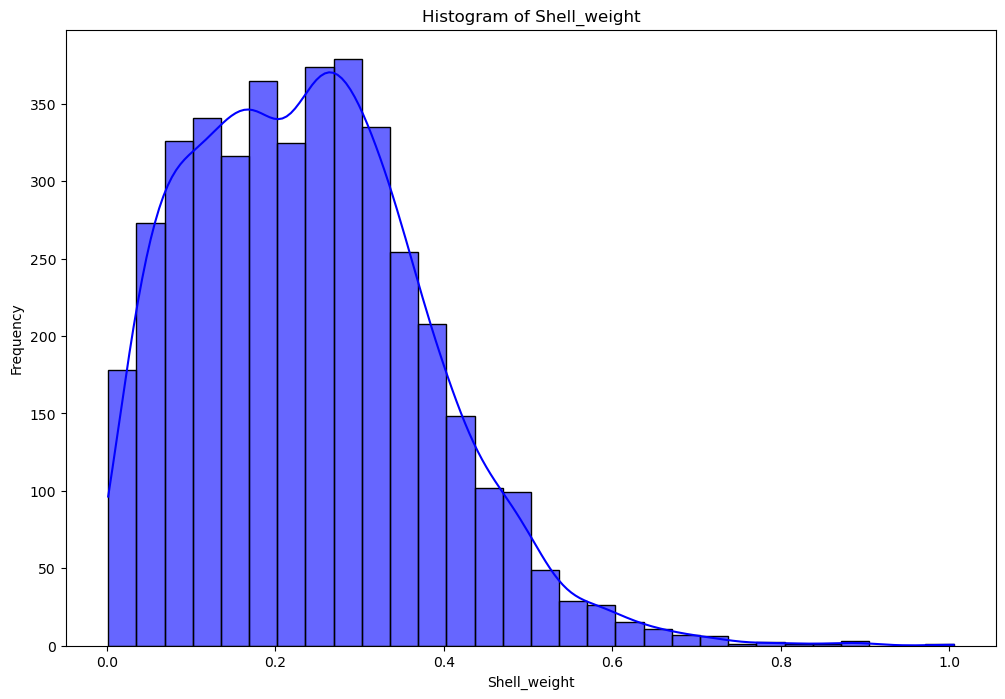

In [10]:
plt.figure(figsize = (12, 8))
sns.histplot(data = X_cleaned, x = 'Shell_weight', bins = 30, kde = True, color = 'blue', alpha = 0.6)

plt.title('Histogram of Shell_weight')
plt.xlabel('Shell_weight')
plt.ylabel('Frequency')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


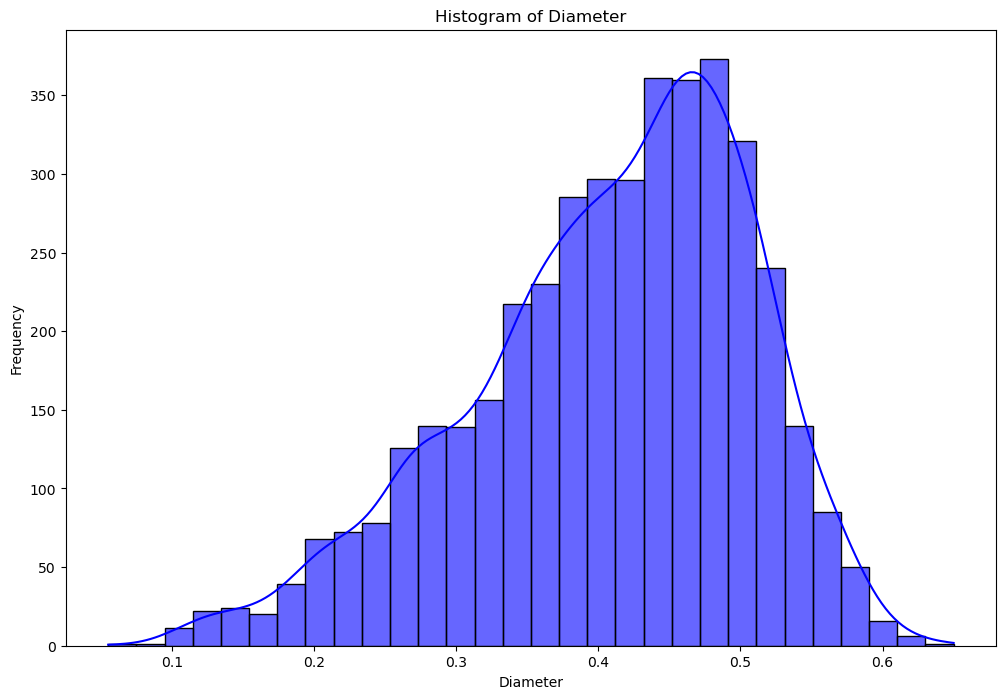

In [11]:
plt.figure(figsize = (12, 8))
sns.histplot(data = X_cleaned, x = 'Diameter', bins = 30, kde = True, color = 'blue', alpha = 0.6)

plt.title('Histogram of Diameter')
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


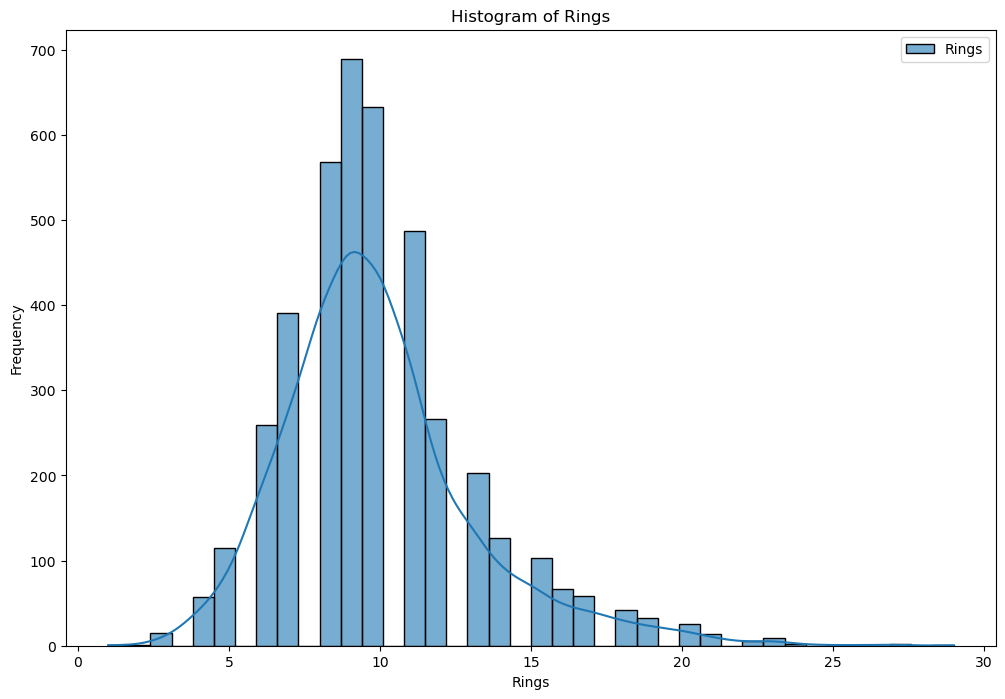

In [12]:
plt.figure(figsize = (12, 8))
sns.histplot(data = y, bins = 40, kde = True, color = 'blue', alpha = 0.6)

plt.title('Histogram of Rings')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()